# 📊 Evaluation Script

## Download and unzip the test set

In [ ]:
!gdown "1HJCiBUvzt3H34DpIaozzMbvAPeKB-wBN"

In [3]:
%%capture
!unzip /content/test.zip

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Read test set data

In [4]:
# DO NOT TOUCH
import cv2
import numpy as np
import glob

## 1. Fill x_test and y_test:
x_test = []
y_test = []
fonts = ['Scheherazade New', 'Marhey', 'Lemonada', 'IBM Plex Sans Arabic',]

for font in fonts:
    for filename in sorted(glob.glob(f'/content/test/{font}/*.jpeg')):
        img = cv2.imread(filename, cv2.COLOR_BGR2RGB)
        x_test.append(img)
        y_test.append(fonts.index(font))

# 2. Convert them to Numpy arrays:
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

print("shape of x_data:", x_test.shape, "shape of y_data:", y_test.shape)
assert set(y_test) == {0, 1, 2, 3}

shape of x_data: (1000, 1181, 1181, 3) shape of y_data: (1000,)


## Let's look at some of the test images

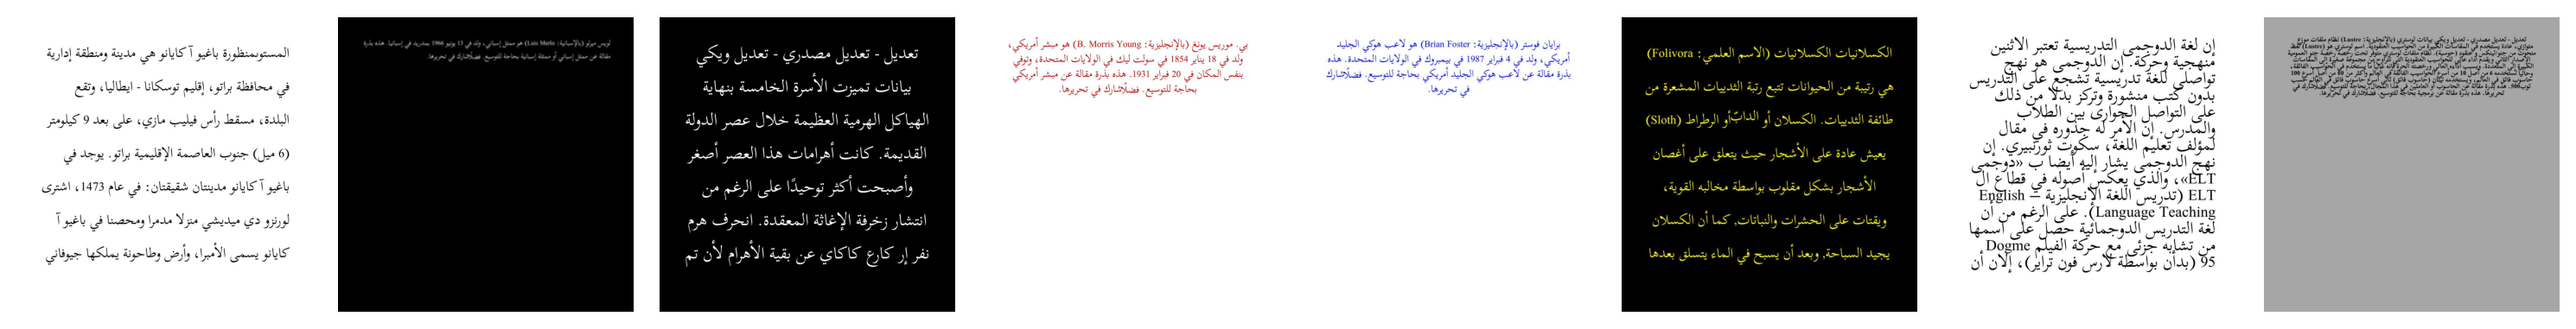

In [5]:
import matplotlib.pyplot as plt


# Create a figure and axis objects
fig, axs = plt.subplots(1, 8, figsize=(15, 10), dpi=200)

# Flatten the axis array
axs = axs.flatten()

# Plot the first 8 images
for i in range(8):
    axs[i].imshow(x_test[i])
    axs[i].axis('off')

plt.tight_layout()
plt.show()


## <font color="red"> Here you define your predict function following this specific interface: </font>

In [6]:
path = "/content/drive/MyDrive/font-recognition-model/"

In [7]:
import sys
sys.path.append(path)

In [8]:
import pickle
import torch
from font_recognition import Preprocessing, PyTorchClassifier

In [ ]:
# Load the preprocessor pipeline
with open(f"{path}preprocess_pipe.pkl", "rb") as f:
    loaded_pipeline = pickle.load(f)

In [10]:
# Intialize the preprocessor
preprocessor = Preprocessing(loaded_pipeline)

# Initilize the pytorch model
pytorch_classifier_hla = PyTorchClassifier(2981, 512, 256, 4 , learning_rate=0.00025, epoch=50)
pytorch_classifier_hla.load_state_dict(torch.load(f"{path}best_model.pth"))
pytorch_classifier_hla.eval()

PyTorchClassifier(
  (model): Sequential(
    (0): Linear(in_features=2981, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=4, bias=True)
  )
)

In [12]:
pytorch_classifier = PyTorchClassifier(18, 512, 256, 4, learning_rate=0.0002, epoch=100)
pytorch_classifier.load_state_dict(torch.load(f"{path}best_model_edm.pth", map_location=torch.device('cpu')))
pytorch_classifier.eval()

PyTorchClassifier(
  (model): Sequential(
    (0): Linear(in_features=18, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=4, bias=True)
  )
)

In [13]:
'''
This function takes an RGB image of dimensions (1181, 1181, 3) from the test set and returns integer prediction ∈ {0,1,2,3}
'''
def make_prediction(x):
    # DEFINE YOUR FUNCTION HERE AND DO NOT CHANGE ANYTHING ELSE IN THE NOTEBOOK
    # Make grayscale
    x = cv2.cvtColor(x, cv2.COLOR_RGB2GRAY)
    x_features , x_features_EDM = preprocessor.preprocess_test(x)
    pred_EDM = pytorch_classifier.predict(x_features_EDM)
    # print ("EDM Probabilities: ", pred_EDM)
    pred_HLA = pytorch_classifier_hla.predict(x_features)
    # print ("Hla Probabilities: ", pred_HLA)
    # Take soft average of the two models
    pred = np.average([pred_EDM, pred_HLA], axis=0)
    # print ("Final Probabilities: ", pred)
    # Take the argmax of the prediction
    pred = np.argmax(pred, axis=1)
    return pred[0]

# Fill your team number here
TEAM_NUM = "4"

## Now let's compute the accuracy of the model:

In [ ]:
### DO NOT TOUCH

import time

start_time = time.time()

y_pred = []
for x in x_test:
    assert x.shape == (1181, 1181, 3)
    ŷ = make_prediction(x)
    y_pred.append(ŷ)

end_time = time.time()
avg_execution_time = (end_time - start_time) / len(x_test) * 1000

y_pred = np.asarray(y_pred)
accuracy = np.mean(y_pred == y_test)

print(f"Team {TEAM_NUM} got accuracy: {accuracy:.2%}")
print(f"Execution time: {avg_execution_time:.2f} milliseconds")
### DO NOT TOUCH

In [ ]:
y_pred.T

In [ ]:
y_test.T